<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualization-of-Datasets" data-toc-modified-id="Visualization-of-Datasets-1">Visualization of Datasets</a></span></li><li><span><a href="#&quot;El-clasico&quot;" data-toc-modified-id="&quot;El-clasico&quot;-2">"El clasico"</a></span><ul class="toc-item"><li><span><a href="#Importing-a-CSV-file-with-Pandas" data-toc-modified-id="Importing-a-CSV-file-with-Pandas-2.1">Importing a CSV file with Pandas</a></span></li><li><span><a href="#Plotting-a-specific-column" data-toc-modified-id="Plotting-a-specific-column-2.2">Plotting a specific column</a></span></li><li><span><a href="#Histogram-Plots" data-toc-modified-id="Histogram-Plots-2.3">Histogram Plots</a></span></li></ul></li></ul></div>

# Visualization of Datasets
**FIZ353 - Numerical Analysis | 16/10/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

It's always beneficial to check the data before and after we process it as it can offer some hidden relations or the picking of off values. Even though the `matplotlib` module offers elasticity, unfortunately it is not known for its practicality. Wrappers like the `seaborn` module provide functionality with ease.

# "El clasico"

Let's try to do it old way, using numpy & matplotlib. As we have observed in our previous lecture, since numpy arrays can not (by default) store elements of different types, our string timestamps are lost in import.

In [1]:
import numpy as np

data_np = np.genfromtxt("01_dataexport_20201008T180753.csv", delimiter=',',
                        filling_values=0.0,skip_header=10)
data_np

array([[ 0.       , 12.437169 , 59.       ,  0.       ],
       [ 0.       , 12.557169 , 63.       ,  0.       ],
       [ 0.       , 13.177169 , 68.       ,  0.       ],
       [ 0.       , 13.087169 , 76.       ,  0.       ],
       [ 0.       , 12.867169 , 81.       ,  0.       ],
       [ 0.       , 11.567169 , 88.       ,  0.       ],
       [ 0.       , 11.177169 , 90.       ,  0.       ],
       [ 0.       , 12.187169 , 87.       ,  0.       ],
       [ 0.       , 13.797169 , 78.       ,  0.       ],
       [ 0.       , 14.967169 , 72.       ,  0.       ],
       [ 0.       , 16.787169 , 62.       ,  0.       ],
       [ 0.       , 18.367168 , 55.       ,  0.       ],
       [ 0.       , 20.957169 , 41.       ,  0.       ],
       [ 0.       , 22.057169 , 36.       ,  0.       ],
       [ 0.       , 22.857168 , 33.       ,  0.       ],
       [ 0.       , 23.527168 , 29.       ,  0.       ],
       [ 0.       , 23.40717  , 28.       ,  0.       ],
       [ 0.       , 22.687168 ,

In [2]:
data_np.shape

(192, 4)

We're going to implement meaningful indexes as the first column, by joining the day index with the hour - mind that this wouldn't be too productive if we had more than 10 days (and why is that? and how would you fix it?)

In [3]:
i = 0
for d in range(1,9):
    for h in range(0,24):
        data_np[i,0] = "{:d}{:02d}".format(d,h)
        i += 1
data_np

array([[100.       ,  12.437169 ,  59.       ,   0.       ],
       [101.       ,  12.557169 ,  63.       ,   0.       ],
       [102.       ,  13.177169 ,  68.       ,   0.       ],
       [103.       ,  13.087169 ,  76.       ,   0.       ],
       [104.       ,  12.867169 ,  81.       ,   0.       ],
       [105.       ,  11.567169 ,  88.       ,   0.       ],
       [106.       ,  11.177169 ,  90.       ,   0.       ],
       [107.       ,  12.187169 ,  87.       ,   0.       ],
       [108.       ,  13.797169 ,  78.       ,   0.       ],
       [109.       ,  14.967169 ,  72.       ,   0.       ],
       [110.       ,  16.787169 ,  62.       ,   0.       ],
       [111.       ,  18.367168 ,  55.       ,   0.       ],
       [112.       ,  20.957169 ,  41.       ,   0.       ],
       [113.       ,  22.057169 ,  36.       ,   0.       ],
       [114.       ,  22.857168 ,  33.       ,   0.       ],
       [115.       ,  23.527168 ,  29.       ,   0.       ],
       [116.       ,  23

...and here comes the basic plot:

In [4]:
import matplotlib.pyplot as plt

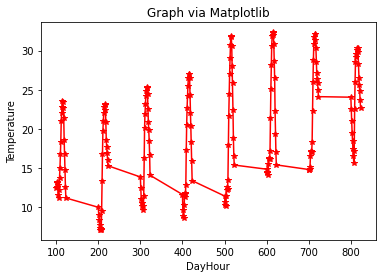

In [5]:
plt.plot(data_np[:,0],data_np[:,1],"r-*")
plt.title("Graph via Matplotlib")
plt.xlabel("DayHour")
plt.ylabel("Temperature")
plt.show()

## Importing a CSV file with Pandas

Now that we have experienced the pains of the "old" method, let's revive the technique we have acquired last week: using `Pandas` to hold the data in a dataframe!

In [6]:
import pandas as pd
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
data1 = pd.read_csv("01_dataexport_20201008T180753.csv",
                                         skiprows=9)
data1.columns = ['Timestamp','Temperature','Relative Humidity','Precipitation Total']
data1 = data1.set_index('Timestamp')
data1

,Temperature,Relative Humidity,Precipitation Total
Timestamp,,,
20201001T0000,12.437169,59.0,0.0
20201001T0100,12.557169,63.0,0.0
20201001T0200,13.177169,68.0,0.0
20201001T0300,13.087169,76.0,0.0
20201001T0400,12.867169,81.0,0.0
...,...,...,...
20201008T1900,26.437168,20.0,0.0
20201008T2000,25.567170,21.0,0.0
20201008T2100,24.777168,22.0,0.0


Even though, it is completely possible to plot dataframe using `matplotlib` there's actually a much better way to do it: enter the `seaborn` module!

In [7]:
import seaborn as sns
sns.set_theme() # To make things appear "more beautiful" 8)

In [8]:
# %matplotlib notebook

Here, it's as simple as it gets! We are just letting seaborne to figure out what we need:

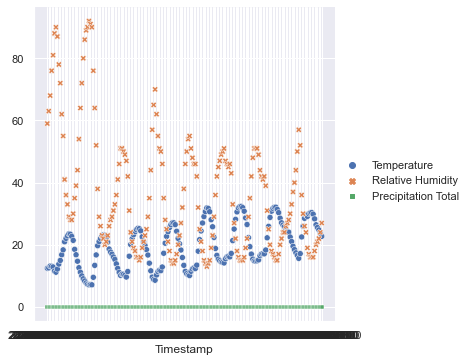

In [9]:
plt1 = sns.relplot(data=data1)

## Plotting a specific column
We can easily designate columns to be used for the x & y parameters for our graph:

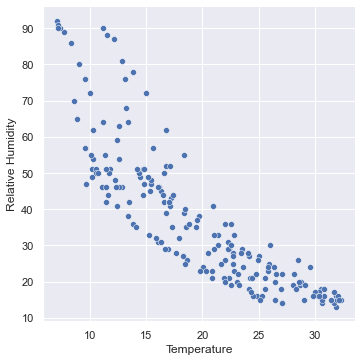

In [11]:
plt2 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity")

__relplot ile scatter plot ayni isi yapti__

<AxesSubplot:xlabel='Temperature', ylabel='Relative Humidity'>

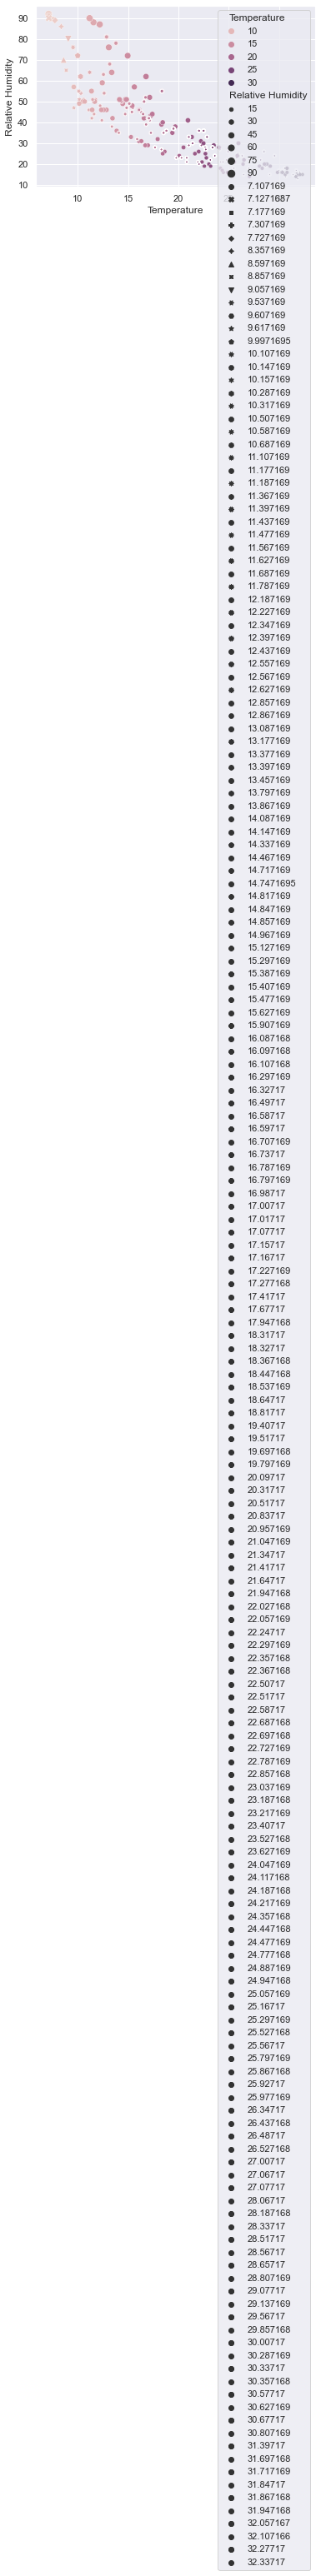

In [18]:
sns.scatterplot(data=data1,x="Temperature",y="Relative Humidity",hue="Temperature",size="Relative Humidity",style="Temperature")

And here is a beauty: by `hue` and `size` parameters, we can classify using other column values, making it easier to investigate the dependencies wrt these columns:

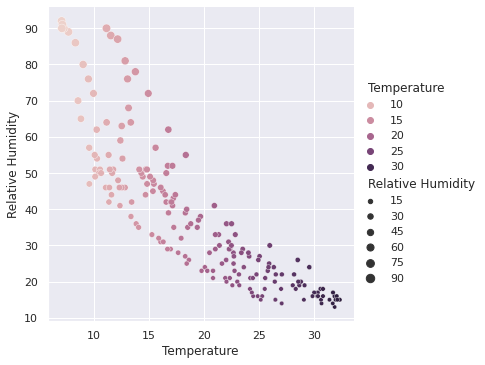

In [11]:
plt3 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  hue="Temperature",size="Relative Humidity")

And this is our attempt to further classify things by adding the `style` alas it kind of fails

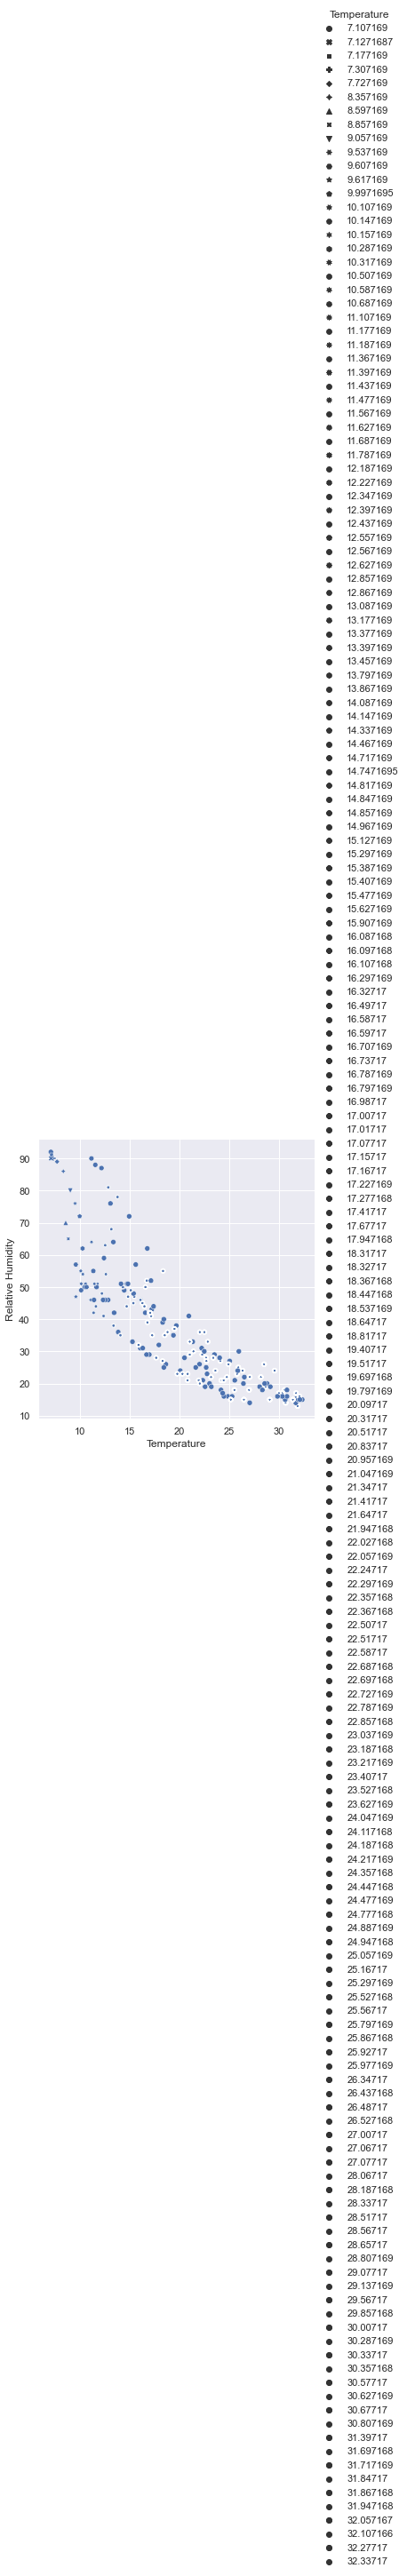

In [19]:
plt3 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  style="Temperature")

Seems that it doesn't like so many classification wrt the values. Luckily we can work around it, by _smoothing_ things out! 8)

In [13]:
import numpy as np

In [14]:
data1

,Temperature,Relative Humidity,Precipitation Total
Timestamp,,,
20201001T0000,12.437169,59.0,0.0
20201001T0100,12.557169,63.0,0.0
20201001T0200,13.177169,68.0,0.0
20201001T0300,13.087169,76.0,0.0
20201001T0400,12.867169,81.0,0.0
...,...,...,...
20201008T1900,26.437168,20.0,0.0
20201008T2000,25.567170,21.0,0.0
20201008T2100,24.777168,22.0,0.0


In [24]:
print("T_min: {:.3f}C | T_max: {:.3f}C"
      .format(data1.Temperature.min(),data1.Temperature.max()))

T_min: 7.107C | T_max: 32.337C


In [25]:
print(data1.index[data1.Temperature==data1.Temperature.min()][0])

20201002T0500


In [26]:
np.floor(data1.Temperature / 10.0) * 10

Timestamp
20201001T0000    10.0
20201001T0100    10.0
20201001T0200    10.0
20201001T0300    10.0
20201001T0400    10.0
                 ... 
20201008T1900    20.0
20201008T2000    20.0
20201008T2100    20.0
20201008T2200    20.0
20201008T2300    20.0
Name: Temperature, Length: 192, dtype: float64

In [27]:
data1.Temperature

Timestamp
20201001T0000    12.437169
20201001T0100    12.557169
20201001T0200    13.177169
20201001T0300    13.087169
20201001T0400    12.867169
                   ...    
20201008T1900    26.437168
20201008T2000    25.567170
20201008T2100    24.777168
20201008T2200    23.627169
20201008T2300    22.727169
Name: Temperature, Length: 192, dtype: float64

Here we add a new column `TempFloor` that stores the smoothed out temperature values:

In [28]:
data1['TempFloored'] = np.floor(data1.Temperature / 10.0) * 10

In [29]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored
Timestamp,,,,
20201001T0000,12.437169,59.0,0.0,10.0
20201001T0100,12.557169,63.0,0.0,10.0
20201001T0200,13.177169,68.0,0.0,10.0
20201001T0300,13.087169,76.0,0.0,10.0
20201001T0400,12.867169,81.0,0.0,10.0
...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0
20201008T2000,25.567170,21.0,0.0,20.0
20201008T2100,24.777168,22.0,0.0,20.0


and voilà!

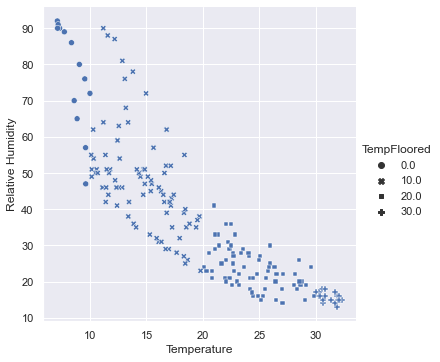

In [30]:
plt4 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  style="TempFloored")

Enough with the scatter plots, lets connect the dots with the `kind` parameter:

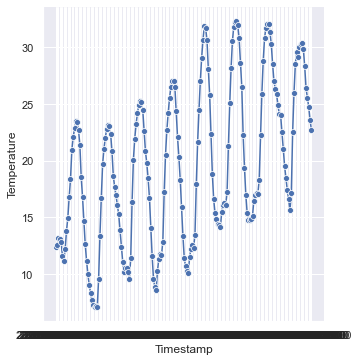

In [31]:
plt4 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line", marker="o")

Here is the same thing without the markers:

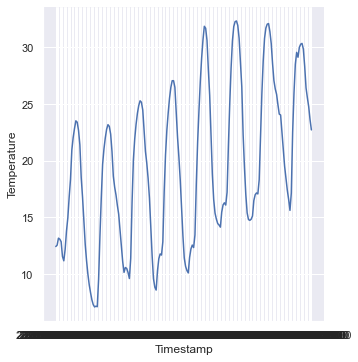

In [32]:
plt4_2 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line")

In [41]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored
Timestamp,,,,
20201001T0000,12.437169,59.0,0.0,10.0
20201001T0100,12.557169,63.0,0.0,10.0
20201001T0200,13.177169,68.0,0.0,10.0
20201001T0300,13.087169,76.0,0.0,10.0
20201001T0400,12.867169,81.0,0.0,10.0
...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0
20201008T2000,25.567170,21.0,0.0,20.0
20201008T2100,24.777168,22.0,0.0,20.0


In [42]:
data1["Relative Humidity"].mean()

37.390625

In [43]:
data1['RHClass'] = 0

In [44]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored,RHClass
Timestamp,,,,,
20201001T0000,12.437169,59.0,0.0,10.0,0
20201001T0100,12.557169,63.0,0.0,10.0,0
20201001T0200,13.177169,68.0,0.0,10.0,0
20201001T0300,13.087169,76.0,0.0,10.0,0
20201001T0400,12.867169,81.0,0.0,10.0,0
...,...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0,0
20201008T2000,25.567170,21.0,0.0,20.0,0
20201008T2100,24.777168,22.0,0.0,20.0,0


In [45]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored,RHClass
Timestamp,,,,,
20201001T0000,12.437169,59.0,0.0,10.0,0
20201001T0100,12.557169,63.0,0.0,10.0,0
20201001T0200,13.177169,68.0,0.0,10.0,0
20201001T0300,13.087169,76.0,0.0,10.0,0
20201001T0400,12.867169,81.0,0.0,10.0,0
...,...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0,0
20201008T2000,25.567170,21.0,0.0,20.0,0
20201008T2100,24.777168,22.0,0.0,20.0,0


In [53]:
mask = data1['Relative Humidity']>37

In [54]:
mask

Timestamp
20201001T0000     True
20201001T0100     True
20201001T0200     True
20201001T0300     True
20201001T0400     True
                 ...  
20201008T1900    False
20201008T2000    False
20201008T2100    False
20201008T2200    False
20201008T2300    False
Name: Relative Humidity, Length: 192, dtype: bool

In [55]:
data1.loc[mask,'RHClass'] = 'humid'
data1.loc[np.invert(mask),'RHClass'] = 'dry'

In [56]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored,RHClass
Timestamp,,,,,
20201001T0000,12.437169,59.0,0.0,10.0,humid
20201001T0100,12.557169,63.0,0.0,10.0,humid
20201001T0200,13.177169,68.0,0.0,10.0,humid
20201001T0300,13.087169,76.0,0.0,10.0,humid
20201001T0400,12.867169,81.0,0.0,10.0,humid
...,...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0,dry
20201008T2000,25.567170,21.0,0.0,20.0,dry
20201008T2100,24.777168,22.0,0.0,20.0,dry


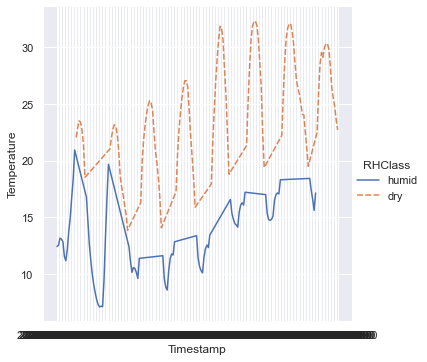

In [57]:
plt5 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line", 
                   style="RHClass", hue="RHClass")

Text(0.5, 0.98, 'Test Graph')

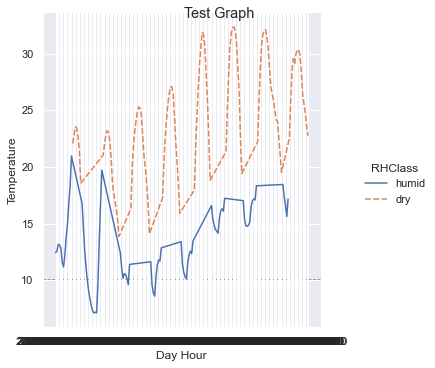

In [58]:
(plt5.map(plt.axhline,y = 10, color=".5", dashes=(2, 1), zorder=0)
.set_axis_labels("Day Hour", "Temperature")
.fig.suptitle("Test Graph"))

## Histogram Plots
Histogram bars are also essentials especially if we are dealing with distributions. 

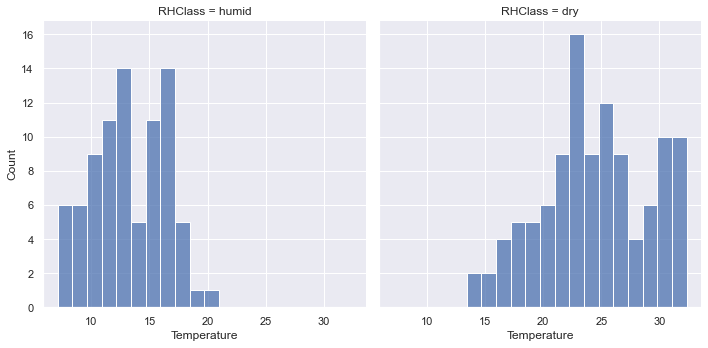

In [59]:
plt6 = sns.displot(data=data1,x="Temperature",col="RHClass",bins=20)

In [60]:
data_g = np.random.normal(0,10,1000)

In [61]:
data_g

array([ 7.73236545e+00,  1.70875908e+00,  6.44094784e+00,  1.30259904e+01,
       -2.02440247e-01, -4.92265421e+00,  7.41364239e+00, -7.57207258e+00,
       -1.44980114e+01, -1.94118176e+00,  1.82960016e+01, -1.42995654e+01,
       -7.44280473e+00,  4.60619498e+00, -2.10578398e+01, -9.65584375e+00,
        7.58052750e+00,  1.14511859e+00,  3.64892200e+00, -1.99753144e+01,
       -4.91316631e+00,  1.18376839e+01,  1.35484200e+01,  7.80566627e+00,
        5.44637829e+00,  1.46224251e+01,  8.30809639e+00, -2.81465187e-01,
        1.70247720e+01,  5.31879093e+00, -1.99775283e+01, -8.85825900e+00,
        1.21594384e+01,  3.95765967e+00, -7.62756729e+00, -1.06295244e+00,
       -5.68445368e+00, -1.04244237e+01,  1.36710078e+01, -9.57048063e+00,
       -1.86511483e+00,  5.25101843e+00,  5.74188744e+00, -1.13799839e+01,
        2.99380794e+00,  8.31670522e+00, -1.42340421e+01, -8.97523733e+00,
       -1.03906518e+01, -2.01077805e+01, -1.50396965e+01,  7.28679748e+00,
        2.48052355e+00, -

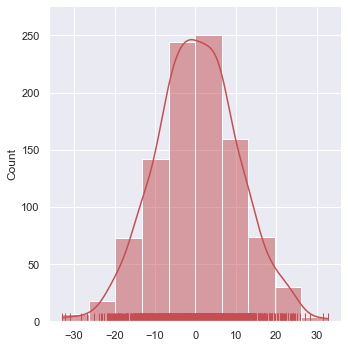

In [62]:
sns.displot(data_g,bins=10,kde=True,rug=True,color="r",)